<a href="https://colab.research.google.com/github/emanuel379/Metodos-Nao-Parametricos/blob/main/Trabalho_1_2_N%C3%A3o_Param%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SME0810 - Métodos Não-Paramétricos: Trabalho 1/2

Ada Maris Pereira Mário - 12725432

Emanuel Victor da Silva Favorato - 12558151

##Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import wilcoxon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
import seaborn as sns

##Teste de McNemar

No problema a seguir, queremos testar a adequabilidade de um modelo de regressão logística no diagnóstico de diabetes para pacientes mulheres, a partir da análise de quantos falsos positivos e negativos este gera, e se esses erros são provenientes do acaso ou são resultantes de falhas sistemáticas.

**Observação:** os dados são provenientes do "National Institute of Diabetes and Digestive and Kidney Diseases", tendo sido coletados de mulheres acima de 21 anos descendentes de indígenas da etnia Pima.



In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

0

# Hipóteses do teste

$H0: P(FP) = P(FN)$ (Falhas provenientes do acaso)

$H1: P(FP) \neq P(FN)$ (Existe um erro sistemático no modelo)

FP: falsos positivos

FN: falsos negativos

Nível de significância: α = 5%

Vamos agora ajustar o modelo de regressão logística aos dados

In [ ]:
# Definindo nossas preditoras, resposta, treinamento e teste

x = df.drop('Outcome', axis = 1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
# Ajustando o modelo logístico

log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(x_train,y_train)

y_pred=log_reg.predict(x_test)

Text(0.5, 1.0, 'Matriz de confusão')

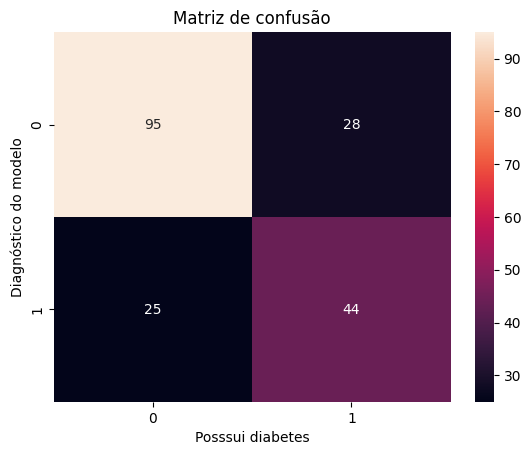

In [ ]:
# Plotando a matriz de confusão

sns.heatmap(data=pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True)
plt.xlabel("Posssui diabetes") # 0: não, 1: sim
plt.ylabel('Diagnóstico do modelo')
plt.title('Matriz de confusão')

É possível observar resultados muito semelhantes nos diagnósticos para falsos positivos e falsos negativos, utilizando o teste mcnemar, vamos verificar se esses erros são provenientes do acaso ou não.

In [ ]:
confusion_matrix(y_test,y_pred)

array([[95, 28],
       [25, 44]])

In [ ]:
# Tabela de contingência baseada na matriz de confusão
contingency_table = np.array([[95, 28],
                               [25, 44]])

# Realizando o teste de mcnemar com correção
result = mcnemar(contingency_table, exact = False) # exact = False para estatística de teste qui-quadrado com correção

# Resultados
print(f"Estatística de teste: {result.statistic}")
print(f"P-valor: {result.pvalue}")

Estatística de teste: 0.07547169811320754
P-valor: 0.7835304977741095


Como $valor-p > α$, não rejeitamos $H0$.

**Conclusão:** ao nível de significância α = 5%, os dados nos fornecem evidências de que os erros de diagnóstico são provenientes do acaso e não devido a falhas sistemáticas no modelo de regressão logística.

##Teste dos Sinais e de Wilcoxon

###Dados

Os dados a seguir são referentes a um experimento sobre efeitos de medicamentos ansiolíticos benzodiazepínicos na memória. Os medicamentos testados foram são Alprazolam (A), Triazolam (T), e um grupo Placebo (S). Cada medicamento tem dosagens que vão de 1 a 3, com 1 sendo a mais baixa e 3 a mais alta. \
Neste estudo, o interesse inicial é em relação aos efeitos do Alprazolam em dose baixa na pontuação de memória.

In [ ]:
df2 = pd.read_csv('Islander_data.csv')
df2 = df2[df2["Drug"] == 'A']
df2 = df2[df2["Dosage"] == 1]

In [ ]:
df2.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [ ]:
df2.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,23.000000,23.0,23.000000,23.000000,23.000000
mean,40.086957,1.0,58.252174,58.556522,0.304348
std,11.622521,0.0,14.692604,16.269822,8.277378
min,25.000000,1.0,35.500000,32.800000,-11.200000
25%,29.000000,1.0,47.650000,46.050000,-5.600000
50%,38.000000,1.0,54.800000,56.000000,-1.300000
75%,50.500000,1.0,65.200000,68.950000,4.700000
max,63.000000,1.0,90.000000,102.000000,21.100000


In [ ]:
df2.isna().sum()

,0
first_name,0
last_name,0
age,0
Happy_Sad_group,0
Dosage,0
Drug,0
Mem_Score_Before,0
Mem_Score_After,0
Diff,0


In [ ]:
df2.duplicated().sum()

0

###Teste dos Sinais

Hipóteses: \
\
$H_0: P(+) = P(-) \quad X \quad H_1: P(+)<P(-)$ \
\
Ou seja, queremos testar se a medicação A (Alprazolam), ainda que em doses baixas, causa efeitos colaterais  na cognição, deixando a memória mais lenta nos indivíduos testados. \
Nível de significância: $\alpha = 5\%$

In [ ]:
A = np.array(df2['Mem_Score_Before']) #A: Antes
D = np.array(df2['Mem_Score_After']) #D: Depois

In [ ]:
A

array([63.5, 41.6, 59.7, 51.7, 47. , 66.4, 44.1, 76.3, 56.2, 54.8, 90. ,
       52.3, 35.5, 85.6, 42.3, 53.5, 48.3, 64. , 74.3, 45. , 52.1, 79.9,
       55.7])

In [ ]:
D

array([ 61.2,  40.7,  55.1,  51.2,  47.1,  58.1,  56. ,  74.8,  45. ,
        75.9, 102. ,  63.7,  40.7,  84.3,  32.8,  56.3,  44.6,  72.5,
        65.4,  49.2,  44.2,  73.3,  52.7])

In [ ]:
p = 0.5
diff = D-A # ou a coluna "Diff" do df
n = len([i for i in diff if i!=0])
B = len([i for i in diff if i>0])

In [ ]:
p_value = binom.cdf(B, n, p)
print("p-valor:", p_value)

p-valor: 0.2024364471435547


Como $p-valor = 0,202 > \alpha = 0,05$, não rejeitamos $H_0$. \
Logo, ao nível de 5% de significância, os dados evidenciam que o Alprazolam em doses baixas não provoca efeitos na cognição de modo a deixar mais lenta a memória.

###Teste de Wilcoxon

Aqui, uma hipótese equivalente ao teste anterior: \
\
$H_0: E(D) = 0 \quad X \quad H_1: E(D)<0$ \


In [ ]:
wilcoxon(D, A, alternative='less')

WilcoxonResult(statistic=132.0, pvalue=0.434833288192749)

No R, obtiveram-se os seguintes resultados:

```
> wilcox.test(y,x,alternative = "less", paired = T,exact=T)

	Wilcoxon signed rank exact test

data:  y and x
V = 132, p-value = 0.4348
alternative hypothesis: true location shift is less than 0

```

Novamente, com $p-valor = 0,435 > \alpha = 0,05$, não rejeitamos $H_0$. \
Portanto, ao nível de 5% de significância, os dados evidenciam que o Alprazolam em doses baixas não provoca efeitos na cognição de modo a deixar mais lenta a memória.